# K-Means

In [1]:
# In this example we use K-Means algorithm to find how many cluster there are in our dataset.

In [2]:
# Importing necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

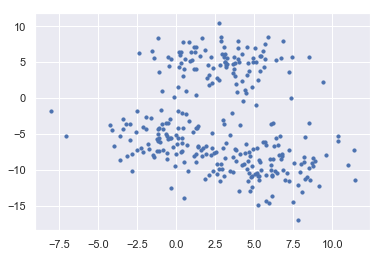

In [109]:
# Creating a dataset using sklearn
from sklearn.datasets.samples_generator import make_blobs
X,y_true = make_blobs(n_samples = 300, centers = 3, cluster_std = 2.5, random_state = 10)
plt.scatter(X[:,0], X[:,1], s=10)

In [110]:
# Let's look at the X data set
df = pd.DataFrame(X, columns=['x_coordinate','y_coordinate'])
df.head()

,x_coordinate,y_coordinate
0,5.139459,5.046646
1,2.282009,-4.915955
2,0.444997,3.019358
3,0.096444,1.581834
4,6.158765,-10.761979


In [111]:
# Creating the K-Means model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [112]:
# y_kmeans value for each point is a cluster number assigned to that point
df['true_cluster'] = y_true
df['predicted_cluster'] = y_kmeans
df.head()

,x_coordinate,y_coordinate,true_cluster,predicted_cluster
0,5.139459,5.046646,1,1
1,2.282009,-4.915955,2,0
2,0.444997,3.019358,1,1
3,0.096444,1.581834,1,1
4,6.158765,-10.761979,0,2


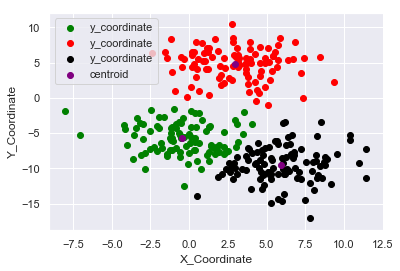

In [118]:
df1 = df[df.predicted_cluster == 0]
df2 = df[df.predicted_cluster == 1]
df3 = df[df.predicted_cluster == 2]

plt.scatter(df1.x_coordinate, df1.y_coordinate, color = 'green')
plt.scatter(df2.x_coordinate, df2.y_coordinate, color = 'red')
plt.scatter(df3.x_coordinate, df3.y_coordinate, color = 'black')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='o',label='centroid')

plt.xlabel('X_Coordinate')
plt.ylabel('Y_Coordinate')
plt.legend()

In [125]:
# For real data sometimes we need to normalize our data then we can apply it in our model
# Let's look at another example (Courtesy of dhavalsays)

df = pd.read_csv(r"C:\Users\Mohsen\Desktop\Unsupervised_ML\income.csv")
df.head()

,Name,Age,Income($)
0,A,39,80000
1,B,41,82000
2,C,39,58000
3,D,37,100000
4,E,26,50000


Text(0, 0.5, 'Income($)')

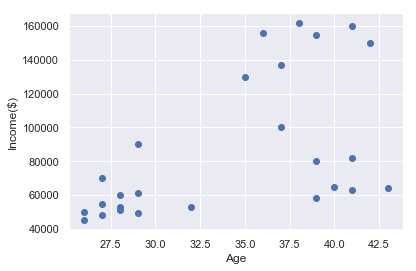

In [126]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [127]:
kmeans_model = KMeans(n_clusters=3)
y_predicted = kmeans_model.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1,
       1, 0, 0, 0])

In [128]:
df['cluster']=y_predicted
print(df.head())
kmeans_model.cluster_centers_

  Name  Age  Income($)  cluster
0    A   39      80000        2
1    B   41      82000        2
2    C   39      58000        0
3    D   37     100000        2
4    E   26      50000        0


array([[3.13333333e+01, 5.63666667e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.65000000e+01, 8.80000000e+04]])

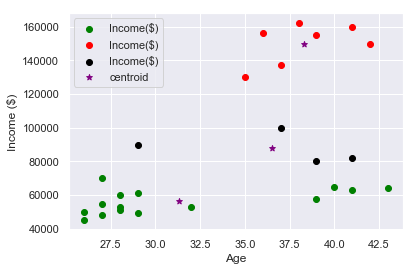

In [129]:


df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(kmeans_model.cluster_centers_[:,0],kmeans_model.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()



In [132]:
# In this case we need to scale our data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df['Income($)'] = scaler.fit_transform(df[['Income($)']])

df['Age'] = scaler.fit_transform(df[['Age']])

df.head()

,Name,Age,Income($),cluster
0,A,0.764706,0.299145,2
1,B,0.882353,0.316239,2
2,C,0.764706,0.111111,0
3,D,0.647059,0.470085,2
4,E,0.000000,0.042735,0


In [133]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 2, 2, 2])

In [134]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,A,0.764706,0.299145,2
1,B,0.882353,0.316239,2
2,C,0.764706,0.111111,2
3,D,0.647059,0.470085,2
4,E,0.000000,0.042735,0


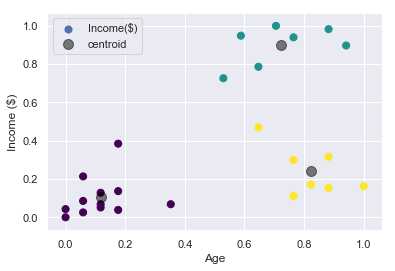

In [144]:
plt.scatter(df['Age'], df['Income($)'], c = y_predicted, s = 50, cmap='viridis')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='o',label='centroid', s = 100, alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [145]:
# Finding Elbow Point
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

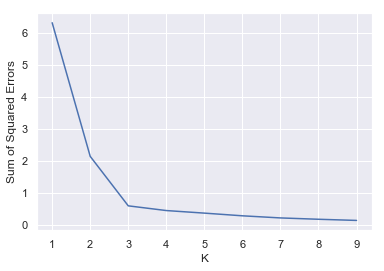

In [147]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Errors')
plt.plot(k_rng,sse)

# 2- Hierarchical Cluster Analysis

In [214]:
# Importing the necessay libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [236]:
# Importing the dataset
data = pd.read_csv(r'C:\Users\Mohsen\Desktop\Unsupervised_ML\Mall_Customers.csv')
X = data.iloc[:, [3, 4]].values
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


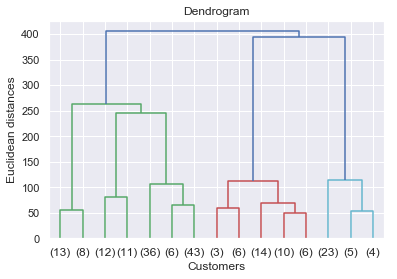

In [216]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
Z= sch.linkage(X, 'ward')
dendrogram = sch.dendrogram(Z, p=15, truncate_mode='lastp')
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [254]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward') # linkage: average, complete # affinity: manhattan
y_hc = hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

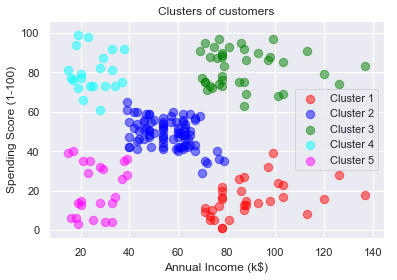

In [255]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 70, c = 'red', label = 'Cluster 1', alpha = 0.5)
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 70, c = 'blue', label = 'Cluster 2',  alpha = 0.5)
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 70, c = 'green', label = 'Cluster 3',  alpha = 0.5)
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 70, c = 'cyan', label = 'Cluster 4',  alpha = 0.5)
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 70, c = 'magenta', label = 'Cluster 5',  alpha = 0.5)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# 3- Principal Component Analysis(PCA)

In [256]:
# Importing necassary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [257]:
# Importing the data set
from sklearn.datasets import load_breast_cancer

In [287]:
# Exploring our data
data = load_breast_cancer()
# dir(data)
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [288]:
print(data.feature_names)
print(len(data['feature_names']))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30


In [306]:
data.data.shape

(569, 30)

In [314]:
#print(data['DESCR'])

In [312]:
columns = data.feature_names
dataset = data.data
df = pd.DataFrame(dataset, columns=columns)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [327]:
# How to choose the number of components in a Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [328]:
# Rescale our data to a range between 0 and 1
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(df)

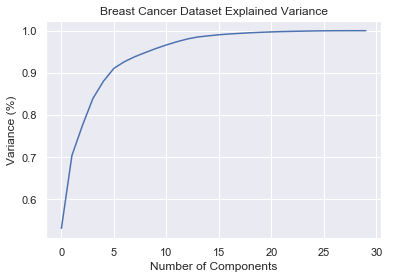

In [329]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Breast Cancer Dataset Explained Variance')
plt.show()

In [330]:
# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
print(scaler.fit(df))
print('\n')

scaled_data=scaler.transform(df)
print(scaled_data)

StandardScaler(copy=True, with_mean=True, with_std=True)


[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [331]:
pca=PCA(n_components=3)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [332]:
x_pca=pca.fit_transform(scaled_data)
x_pca.shape

(569, 3)

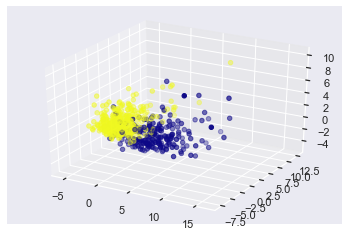

In [355]:
# 3D Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[:,0],x_pca[:,1], x_pca[:,2], c=data['target'], cmap='plasma')
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.set_zlabel('PC3')

Text(0, 0.5, 'Second principle component')

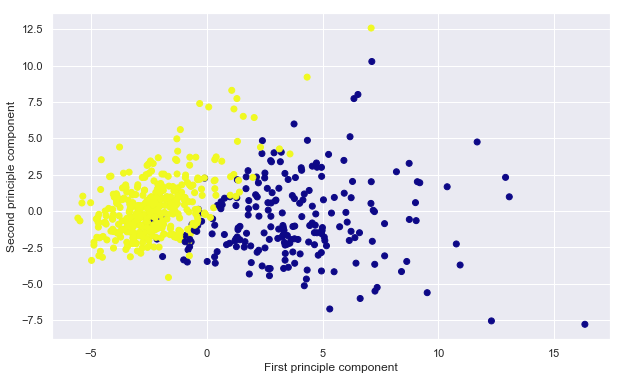

In [344]:
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c=data['target'], cmap='plasma')
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

# 4- Kernel PCA

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [67]:
# Set the seed for random number generator
np.random.seed(1)

In [125]:
# Generate samples
X, y = make_circles(n_samples=500, factor=0.2, noise=0.1)

In [126]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X)

In [127]:
# Perform Kernel PCA
kernel_pca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kernel_pca = kernel_pca.fit_transform(X)
X_inverse = kernel_pca.inverse_transform(X_kernel_pca)

Text(0, 0.5, '2nd dimension')

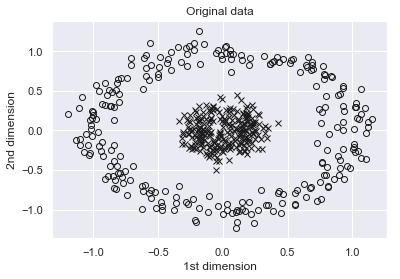

In [128]:
# Plot original data
class_0 = np.where(y == 0)
class_1 = np.where(y == 1)
plt.figure()
plt.title("Original data")
plt.plot(X[class_0, 0], X[class_0, 1], "ko", mfc='none')
plt.plot(X[class_1, 0], X[class_1, 1], "kx")
plt.xlabel("1st dimension")
plt.ylabel("2nd dimension")

Text(0, 0.5, '2nd principal component')

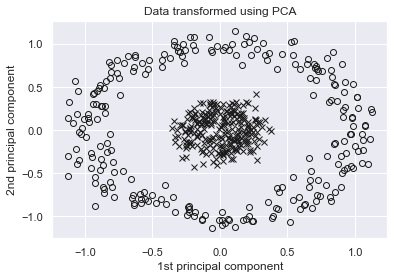

In [129]:
# Plot PCA projection of the data
plt.figure()
plt.plot(X_pca[class_0, 0], X_pca[class_0, 1], "ko", mfc='none')
plt.plot(X_pca[class_1, 0], X_pca[class_1, 1], "kx")
plt.title("Data transformed using PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")

Text(0, 0.5, '2nd principal component')

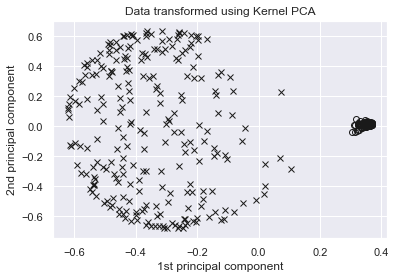

In [130]:
# Plot Kernel PCA projection of the data
plt.figure()
plt.plot(X_kernel_pca[class_0, 0], X_kernel_pca[class_0, 1], "ko", mfc='none')
plt.plot(X_kernel_pca[class_1, 0], X_kernel_pca[class_1, 1], "kx")
plt.title("Data transformed using Kernel PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")

Text(0, 0.5, '2nd dimension')

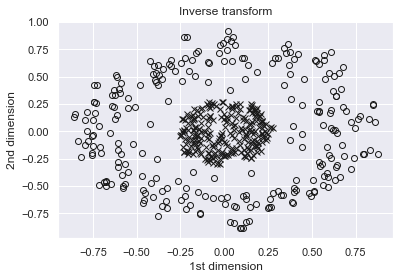

In [131]:
# Transform the data back to original space
plt.figure()
plt.plot(X_inverse[class_0, 0], X_inverse[class_0, 1], "ko", mfc='none')
plt.plot(X_inverse[class_1, 0], X_inverse[class_1, 1], "kx")
plt.title("Inverse transform")
plt.xlabel("1st dimension")
plt.ylabel("2nd dimension")